<a href="https://colab.research.google.com/github/byhaqii/Machine-Learning-2025/blob/main/JS05_TG01_2341720225_Muhammad_Rizal_Al_Baihaqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

## Step 1 - Import Library

In [1]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Step 2 - Load Data and Inspection

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Step 3 - Features Selection

In [5]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [6]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## Step 4 - Plotting

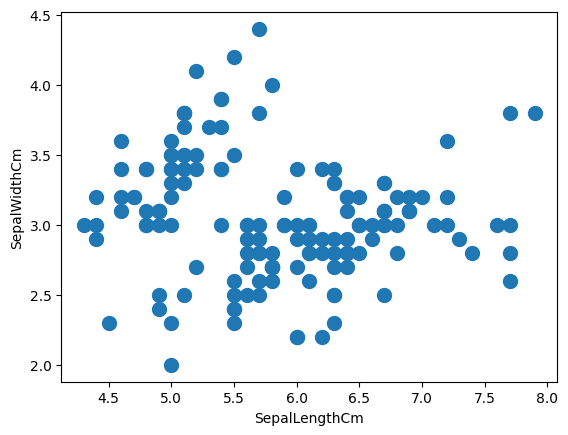

In [7]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

## Step 5 - Build K-Means Model

In [8]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

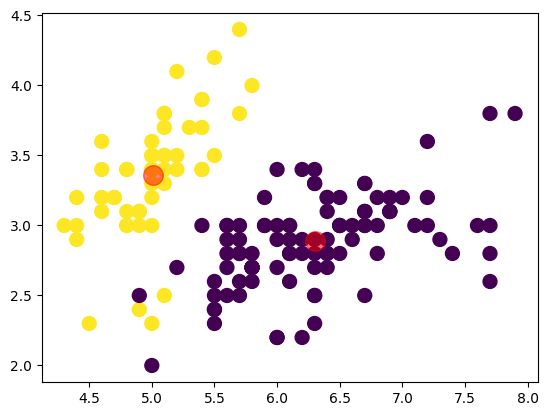

In [9]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## Step 6 - Model Evaluation

In [10]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


## Step 7 - Find The Best k Using Elbow Method

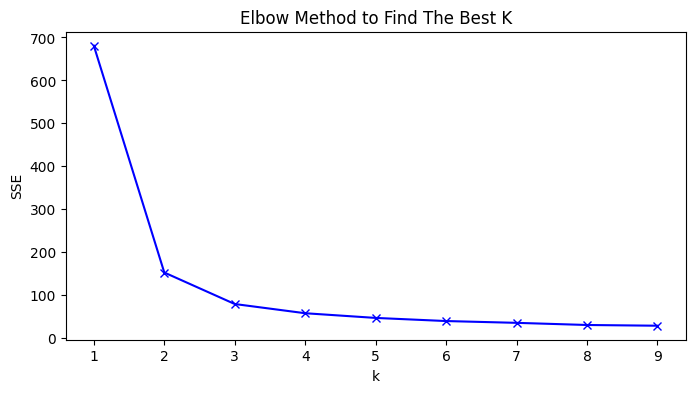

In [11]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

# Lab 2

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1 - Build Synthetic Data

In [13]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

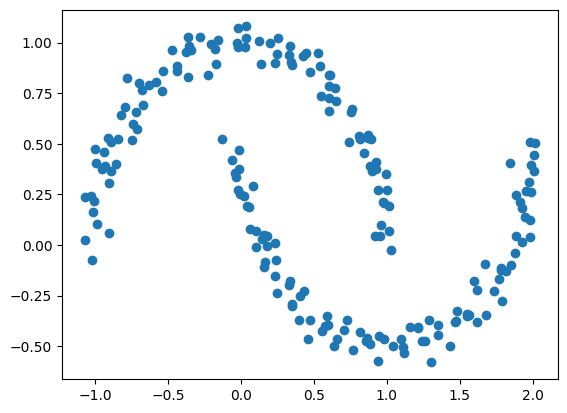

In [14]:
plt.scatter(X[:, 0], X[:, 1])

## Step 2 - Clustering Using K-Means

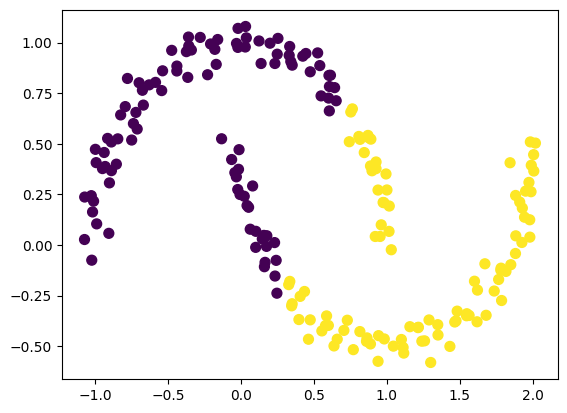

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [16]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


## Step 3 - Clustering Using DBSCAN

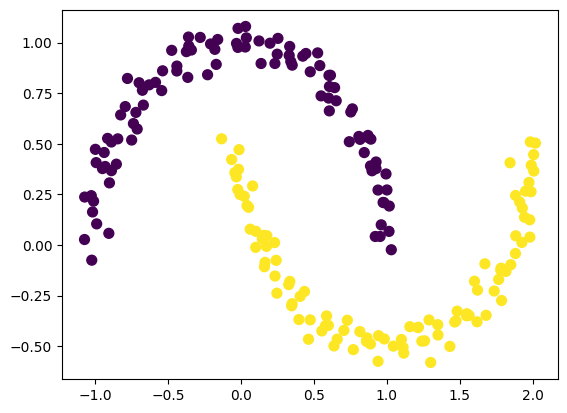

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [18]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


In [19]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# Lab 3

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 1 - Load The Data

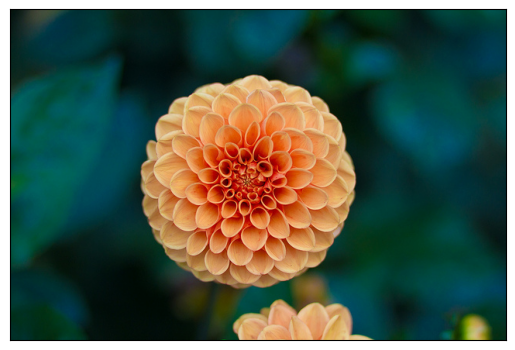

In [21]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

## Step 2 - Preprocessing

In [22]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


## Step 3 - Check Color Distribution

In [23]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

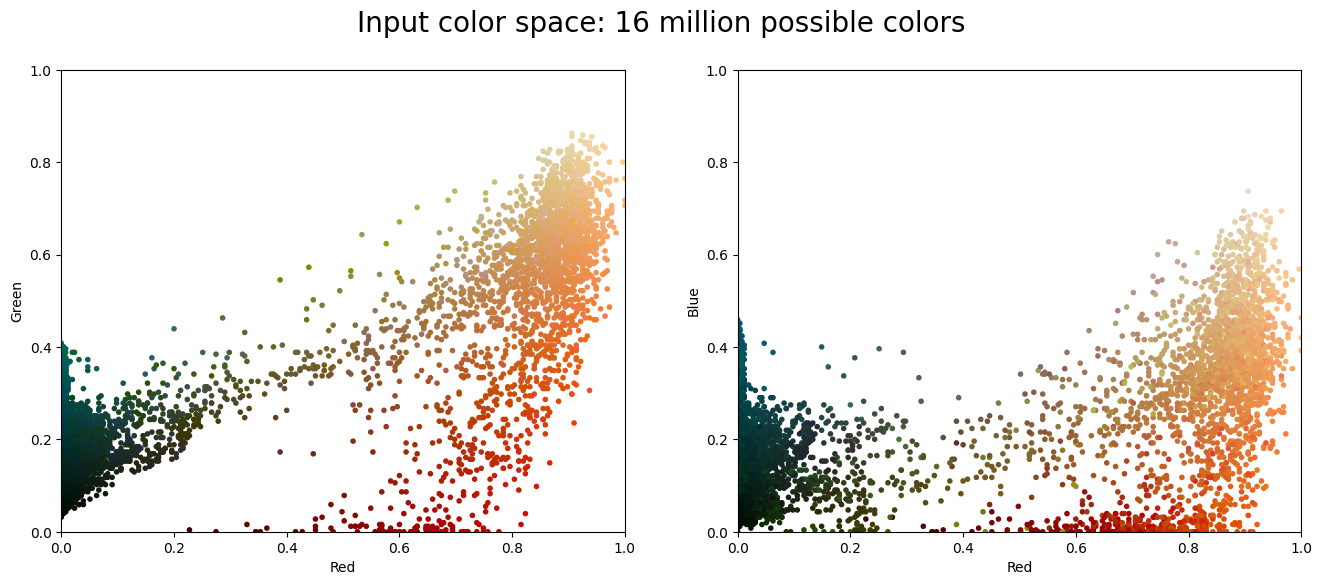

In [24]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Step 4 - Color Clustering Based on Similarity

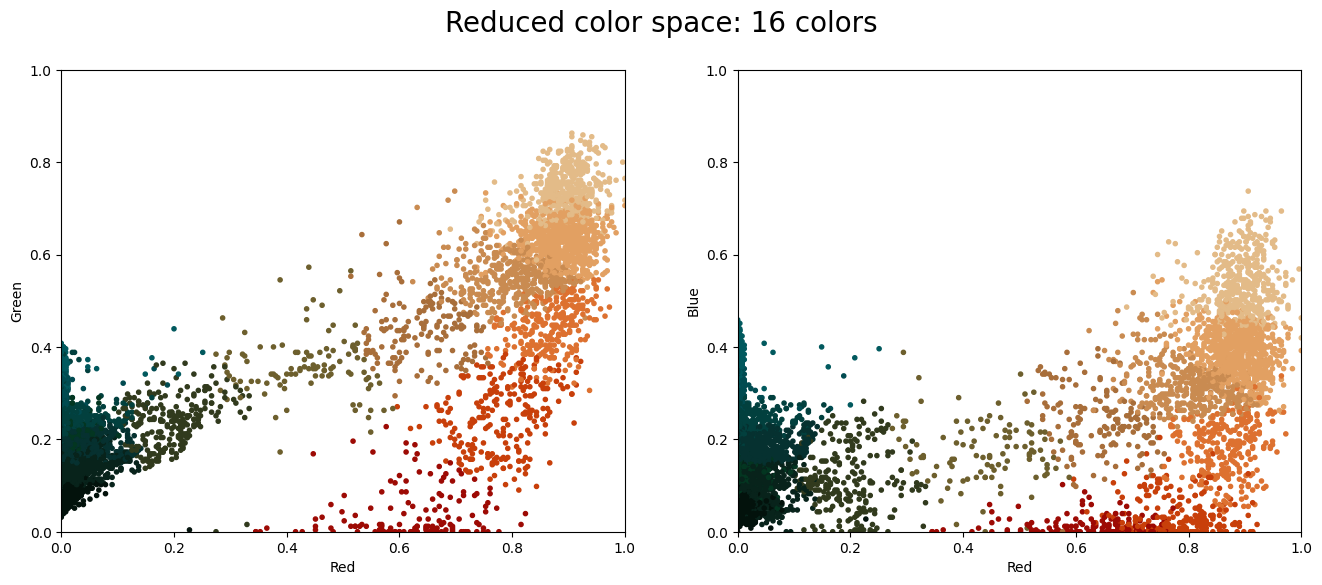

In [25]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

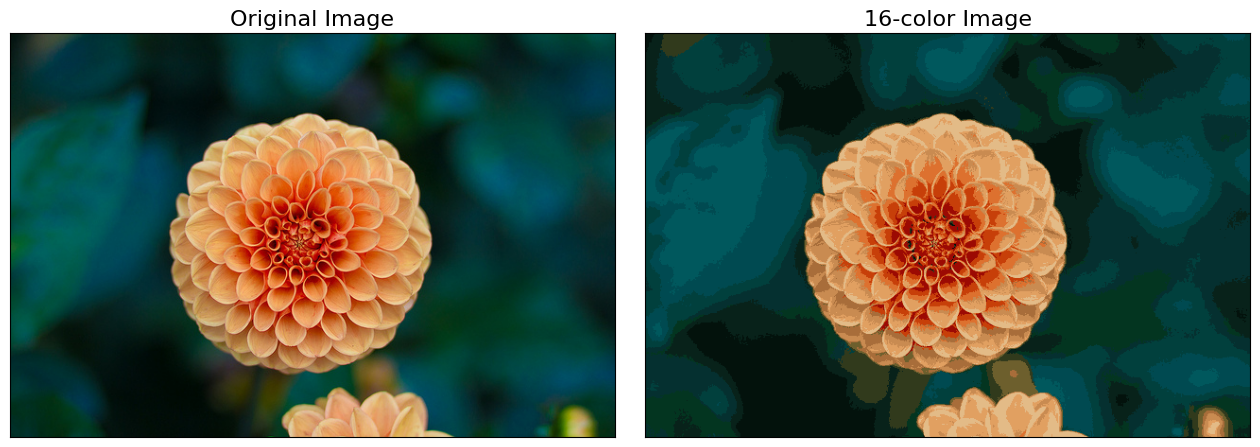

In [26]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Lab Assignment

## No.1

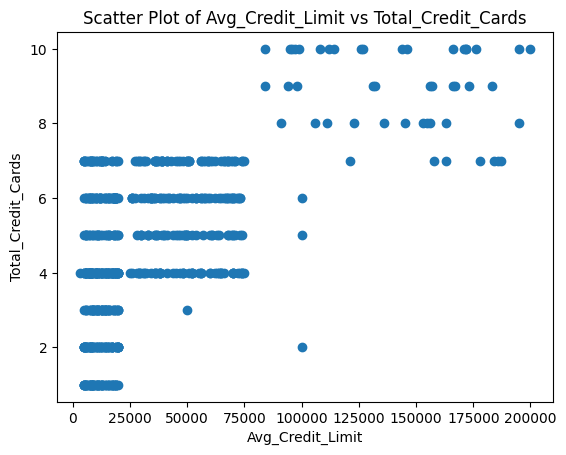

In [27]:
# Load the dataset
df_cc = pd.read_csv('CC_Customer_Dataset.csv')

# Select the required columns
X_cc = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards']]

# Create a scatter plot
plt.scatter(X_cc['Avg_Credit_Limit'], X_cc['Total_Credit_Cards'])
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Scatter Plot of Avg_Credit_Limit vs Total_Credit_Cards')
plt.show()

# Based on the visual inspection of the scatter plot, determine if the data distribution is linear.
# A linear distribution would show the points generally following a straight line.
# If the points are scattered randomly or follow a curved pattern, it is not linear.

## No.2

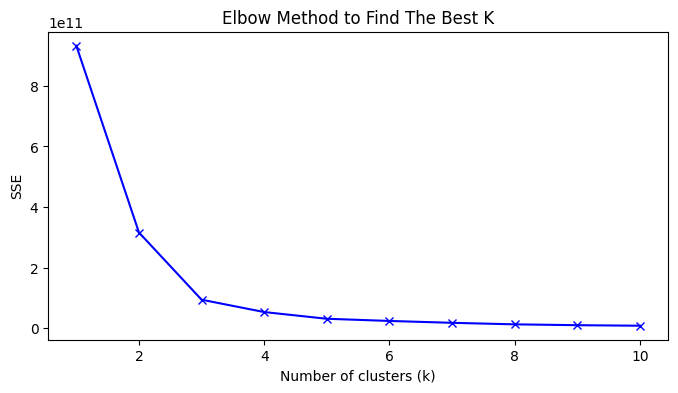

In [28]:
from sklearn.cluster import KMeans

# Find the best k using Elbow Method
sse = [] # List to store SSE values

# Build k range from 1 to 10 (or a suitable range for your data)
K = range(1, 11)

# Find the SSE value for each k
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10) # Added random_state and n_init for reproducibility
    kmeans_model.fit(X_cc)
    sse.append(kmeans_model.inertia_)

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

# Based on the plot, choose the optimal k where the SSE starts to decrease less rapidly (the "elbow").
# Once you have chosen k, you can build the K-Means model with that number of clusters.
# For example, if you choose k=3:
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# cluster_labels = kmeans.fit_predict(X_cc)

# You can then visualize the clusters or perform further analysis.

## No.3

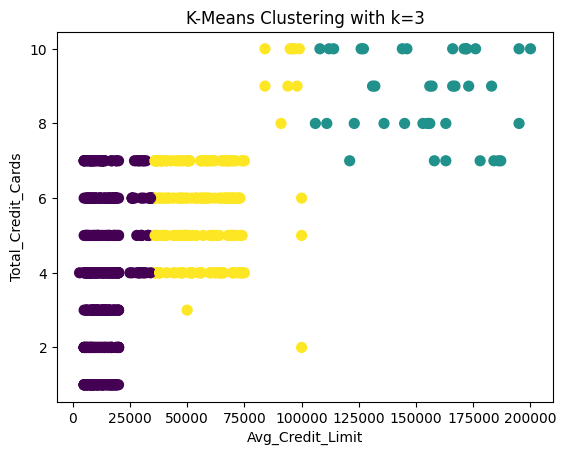

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Based on the Elbow method plot, let's choose optimal_k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cc)

# Visualize the clustering result
plt.scatter(X_cc['Avg_Credit_Limit'], X_cc['Total_Credit_Cards'], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.show()

## No.4

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select all relevant columns for DBSCAN
# Exclude 'Sl_No' and 'Customer Key' as they are identifiers
X_dbscan = df_cc[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# It's good practice to scale the data for DBSCAN as it is sensitive to feature scaling
scaler = StandardScaler()
X_dbscan_scaled = scaler.fit_transform(X_dbscan)

# Build a DBSCAN model
# You might need to tune eps and min_samples based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example values, may need adjustment
cluster_labels_dbscan = dbscan.fit_predict(X_dbscan_scaled)

# You can now analyze the cluster_labels_dbscan
# -1 indicates noise points
print("DBSCAN Cluster Labels:")
print(cluster_labels_dbscan)

# You can also get the number of clusters (excluding noise)
n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
n_noise = list(cluster_labels_dbscan).count(-1)

print(f'\nEstimated number of clusters: {n_clusters_dbscan}')
print(f'Estimated number of noise points: {n_noise}')

# To visualize, you might need dimensionality reduction if you have more than 2-3 features
# For example, using PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_dbscan_scaled)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis')
# plt.title('DBSCAN Clustering (PCA reduced)')
# plt.show()

DBSCAN Cluster Labels:
[-1 -1 -1 -1 -1  2 -1 -1 -1 -1  2  2  0  3  1  2 -1  2  1  3  1  2  3  3
  2  3  2 -1  2  2  3  3 -1  2  3  2 -1  2  3  1  7  6  1  2  1  3  4  1
 -1  1  2  3  3  2  2  4 -1  2  2  3  3 -1 -1  2  2  3  2  1  0  0  0  1
  3  3  2  3  0  3  2  6  1  3  3  3  1  3  3 -1  3  7  3 -1  3  0 -1  0
  1  2  3  3  2  3  3  2 -1  3  3  1  1 -1  1  2  3 -1  2  1  2  2  3  2
  1  2  5  3  1  3  3 -1  3  3  3 -1 -1  3  3  1  2  2  3  2  2  2  3  3
  7  2  3  1 -1  6 -1  3  1  2  7  3 -1  0 -1  4  2  1  2  2  2  2  2  1
  3  3  6  1  2  3 -1 -1  1  2  3  5  2  2  2  0 -1  2  1  1  2  1  2  3
  2  1  2  3  2  6  3  7  2  2  2  2 -1 -1 -1  1  2  2  3  3  3  2  3  2
  3 -1  3  3  2  1  3  1  3 -1  0  1  8  9 10 11 19  8 10 14 10 -1 12 12
 12 10 -1 13 11 12 10 11 10 10 11 12 10 12 -1 10 11 13 11 13 10 11 13 12
 13 13 10 13 10 10 -1  9 12 10 10 12 -1 10 13 10 13  8 11 -1  8 10 10  8
 -1 10 11 11 -1 12 10 13 13 14 10 10 10 13 12 10 13 10 11 11 10 10 10 11
 11 -1 11 11 13 10 13  9 10 

## No.5

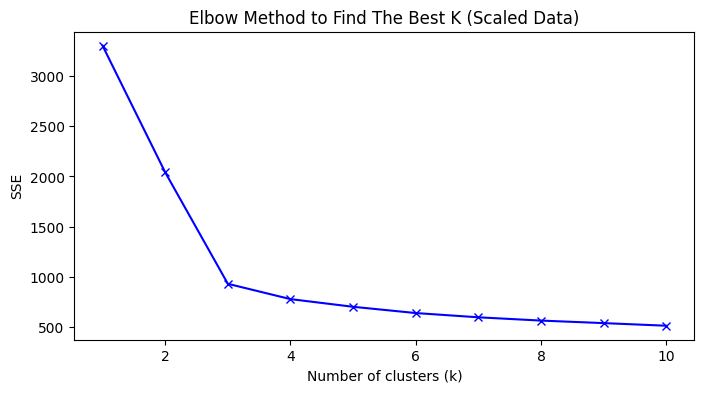

In [31]:
# Find the best k using Elbow Method for the scaled data (used in DBSCAN)
sse_scaled = [] # List to store SSE values for scaled data

# Build k range from 1 to 10 (or a suitable range for your data)
K_scaled = range(1, 11)

# Find the SSE value for each k using the scaled data
for k in K_scaled:
    kmeans_model_scaled = KMeans(n_clusters=k, random_state=42, n_init=10) # Added random_state and n_init for reproducibility
    kmeans_model_scaled.fit(X_dbscan_scaled)
    sse_scaled.append(kmeans_model_scaled.inertia_)

# Plotting the distortions for scaled data
plt.figure(figsize=(8, 4))
plt.plot(K_scaled, sse_scaled, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K (Scaled Data)")
plt.show()

# Based on the plot, choose the optimal k where the SSE starts to decrease less rapidly (the "elbow").

## No.6

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
# Note: Silhouette Score is not well-defined for a single cluster or if all points are noise (-1)
# We need to exclude noise points (-1) for Silhouette Score calculation
X_dbscan_scaled_filtered = X_dbscan_scaled[cluster_labels_dbscan != -1]
cluster_labels_dbscan_filtered = cluster_labels_dbscan[cluster_labels_dbscan != -1]

if len(set(cluster_labels_dbscan_filtered)) > 1:
    silhouette_avg = silhouette_score(X_dbscan_scaled_filtered, cluster_labels_dbscan_filtered)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
else:
    print("Silhouette Score cannot be calculated (less than 2 clusters or all points are noise excluding noise).")


# Calculate Davies-Bouldin Index
# Note: Davies-Bouldin Index is not well-defined for a single cluster or if there are no clusters
if len(set(cluster_labels_dbscan)) > 1 and -1 not in cluster_labels_dbscan:
    db_index = davies_bouldin_score(X_dbscan_scaled, cluster_labels_dbscan)
    print(f"Davies-Bouldin Index for DBSCAN: {db_index}")
elif len(set(cluster_labels_dbscan)) > 2 and -1 in cluster_labels_dbscan:
     # DBI is defined for more than one cluster, but the formula in sklearn handles noise by ignoring it
     db_index = davies_bouldin_score(X_dbscan_scaled[cluster_labels_dbscan != -1], cluster_labels_dbscan[cluster_labels_dbscan != -1])
     print(f"Davies-Bouldin Index for DBSCAN (excluding noise): {db_index}")
else:
    print("Davies-Bouldin Index cannot be calculated (less than 2 clusters excluding noise).")

Silhouette Score for DBSCAN: 0.026998919881489288
Davies-Bouldin Index for DBSCAN (excluding noise): 1.4334915083887771
